<a href="https://colab.research.google.com/github/Akshithaaa11/NLP-execlr/blob/main/nlp_hotel_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [ ]:
def ratings(rating):
  if rating>3 and rating<=5:
    return 'positive'
  if rating>0 and rating<=3:
    return 'negative'

In [ ]:
df['Rating']=df['Rating'].apply(ratings)


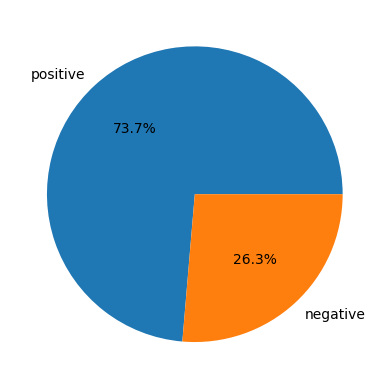

In [ ]:
plt.pie(df['Rating'].value_counts(),labels=df['Rating'].unique().tolist(),autopct='%1.1f%%')
plt.show()

In [ ]:
length=len(df['Review'][0])
print(f'length of the review is {length}')

length of the review is 593


In [ ]:
df['Length']=df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,positive,593
1,ok nothing special charge diamond member hilto...,negative,1689
2,nice rooms not 4* experience hotel monaco seat...,negative,1427
3,"unique, great stay, wonderful time hotel monac...",positive,600
4,"great stay great stay, went seahawk game aweso...",positive,1281


In [ ]:
word_count=df['Review'][0].split()
print(f'length of the review is {len(word_count)}')


length of the review is 87


In [ ]:
def word_count(review):
  review_list=review.split()
  return len(review_list)

In [ ]:
df['Word_Count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_Count
0,nice hotel expensive parking got good deal sta...,positive,593,87
1,ok nothing special charge diamond member hilto...,negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",positive,600,89
4,"great stay great stay, went seahawk game aweso...",positive,1281,191


In [ ]:
df['mean_word_length']=df['Review'].apply(lambda x:np.mean([len(word) for word in x.split()]))
df.head()

,Review,Rating,Length,Word_Count,mean_word_length
0,nice hotel expensive parking got good deal sta...,positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",positive,1281,191,5.701571


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk import tokenize
nltk.download('punkt')
np.mean([len(word) for word in tokenize.word_tokenize(df['Review'][0])])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


5.153061224489796

In [ ]:
features=df.columns.tolist()[2:]
df=df.drop(features,axis=1)
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,positive
1,ok nothing special charge diamond member hilto...,negative
2,nice rooms not 4* experience hotel monaco seat...,negative
3,"unique, great stay, wonderful time hotel monac...",positive
4,"great stay great stay, went seahawk game aweso...",positive


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [ ]:
import re
from nltk.corpus import stopwords
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+','',review)
  review = [word for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  return review


In [ ]:
df['Review']=df['Review'].apply(clean)
df.head()

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Review'][0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary,',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking,',
 'check',
 'quick',
 'easy,',
 'little',
 'disappointed',
 'non-existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size,',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows,',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway,',
 'maybe',
 'just',
 'noisy',
 'neighbors,',
 'aveda',
 'bath',
 'products',
 'nice,',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer,',
 'location',
 'great',
 'walking',
 'distance',
 'shopping,',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night,']

In [ ]:
def corpus(text):
  text_list=text.split()
  return text_list

In [ ]:
df['Review']=df['Review'].apply(corpus)
df.head()


AttributeError: 'list' object has no attribute 'split'

In [ ]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
  corpus+=df['Review'][i]
len(corpus)
from collections import Counter
mostCommon=Counter(corpus).most_common(10)
mostCommon

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 68279.41it/s]


[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [ ]:
words=[]
freq=[]
for word,count in mostCommon:
  words.append(word)
  freq.append(count)


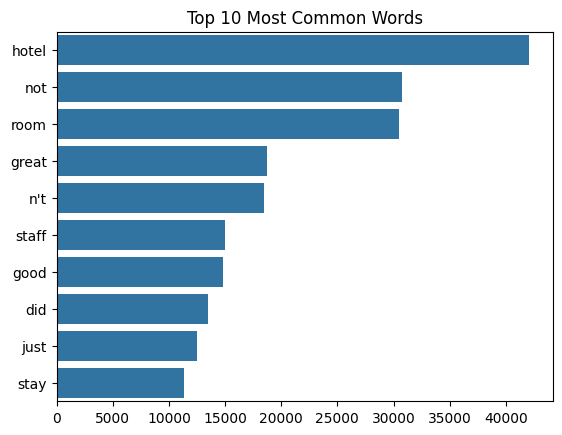

In [ ]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Most Common Words')
plt.show()